In [1]:
 !pip install yfinance matplotlib seaborn pandas scikit-learn


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


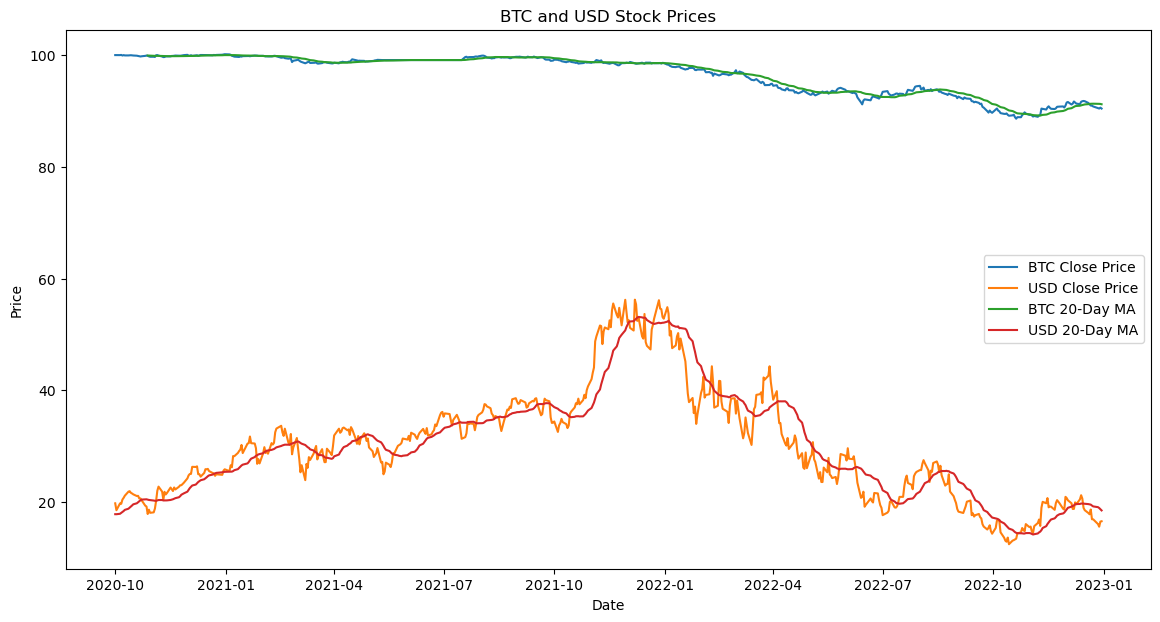

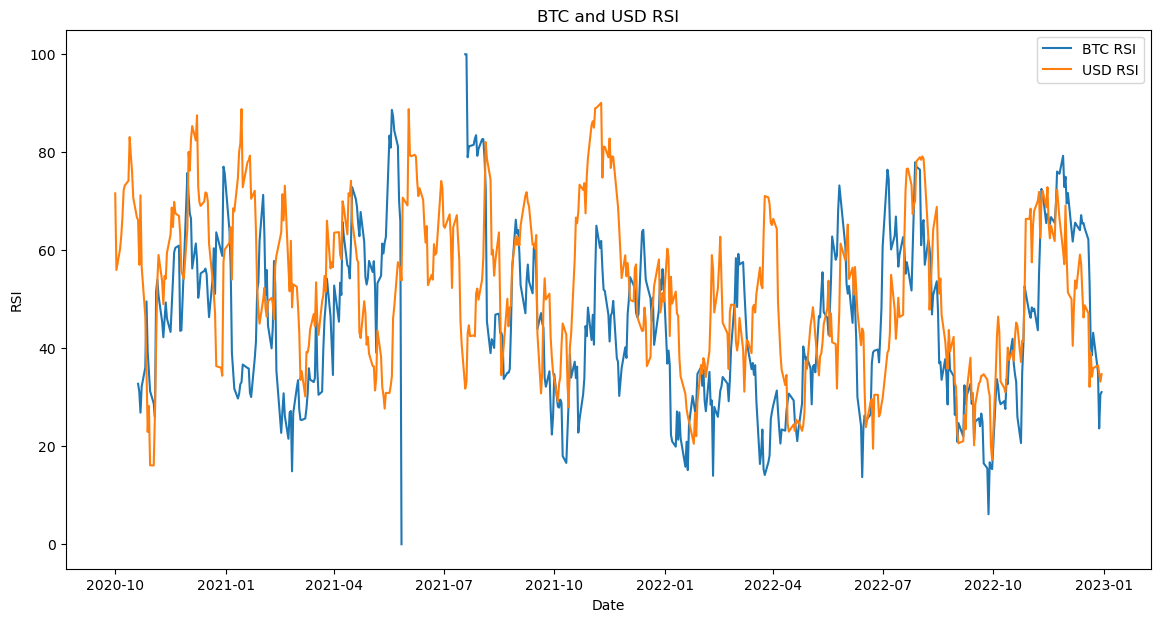

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Preprocess Data
def preprocess_data(stock_data):
    stock_data.dropna(inplace=True)
    stock_data['Date'] = stock_data.index
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    return stock_data

# Calculate Moving Averages
def calculate_moving_averages(stock_data, window=20):
    stock_data['MA'] = stock_data['Close'].rolling(window=window).mean()
    return stock_data

# Calculate RSI
def calculate_rsi(stock_data, window=14):
    delta = stock_data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    stock_data['RSI'] = rsi
    return stock_data

# Fetch and preprocess data for both stocks
ticker = "BTC"
new_ticker = "USD"
start_date = "2020-01-01"
end_date = "2023-01-01"

stock_data = fetch_stock_data(ticker, start_date, end_date)
stock_data = preprocess_data(stock_data)

new_stock_data = fetch_stock_data(new_ticker, start_date, end_date)
new_stock_data = preprocess_data(new_stock_data)

# Calculate moving averages and RSI for both stocks
stock_data = calculate_moving_averages(stock_data)
new_stock_data = calculate_moving_averages(new_stock_data)

stock_data = calculate_rsi(stock_data)
new_stock_data = calculate_rsi(new_stock_data)

# Drop the 'Date' column before resetting the index
stock_data = stock_data.drop(columns=['Date'])
new_stock_data = new_stock_data.drop(columns=['Date'])

# Reset index before merging to avoid ambiguity
stock_data_reset = stock_data.reset_index()
new_stock_data_reset = new_stock_data.reset_index()

# Combine the data for both stocks into a single DataFrame
combined_data = pd.merge(stock_data_reset, new_stock_data_reset, on='Date', suffixes=(f'_{ticker}', f'_{new_ticker}'))

# Plot combined data
plt.figure(figsize=(14, 7))

# Plot closing prices
plt.plot(combined_data['Date'], combined_data[f'Close_{ticker}'], label=f'{ticker} Close Price')
plt.plot(combined_data['Date'], combined_data[f'Close_{new_ticker}'], label=f'{new_ticker} Close Price')

# Plot moving averages
plt.plot(combined_data['Date'], combined_data[f'MA_{ticker}'], label=f'{ticker} 20-Day MA')
plt.plot(combined_data['Date'], combined_data[f'MA_{new_ticker}'], label=f'{new_ticker} 20-Day MA')

plt.title(f'{ticker} and {new_ticker} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI values
plt.figure(figsize=(14, 7))

plt.plot(combined_data['Date'], combined_data[f'RSI_{ticker}'], label=f'{ticker} RSI')
plt.plot(combined_data['Date'], combined_data[f'RSI_{new_ticker}'], label=f'{new_ticker} RSI')

plt.title(f'{ticker} and {new_ticker} RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


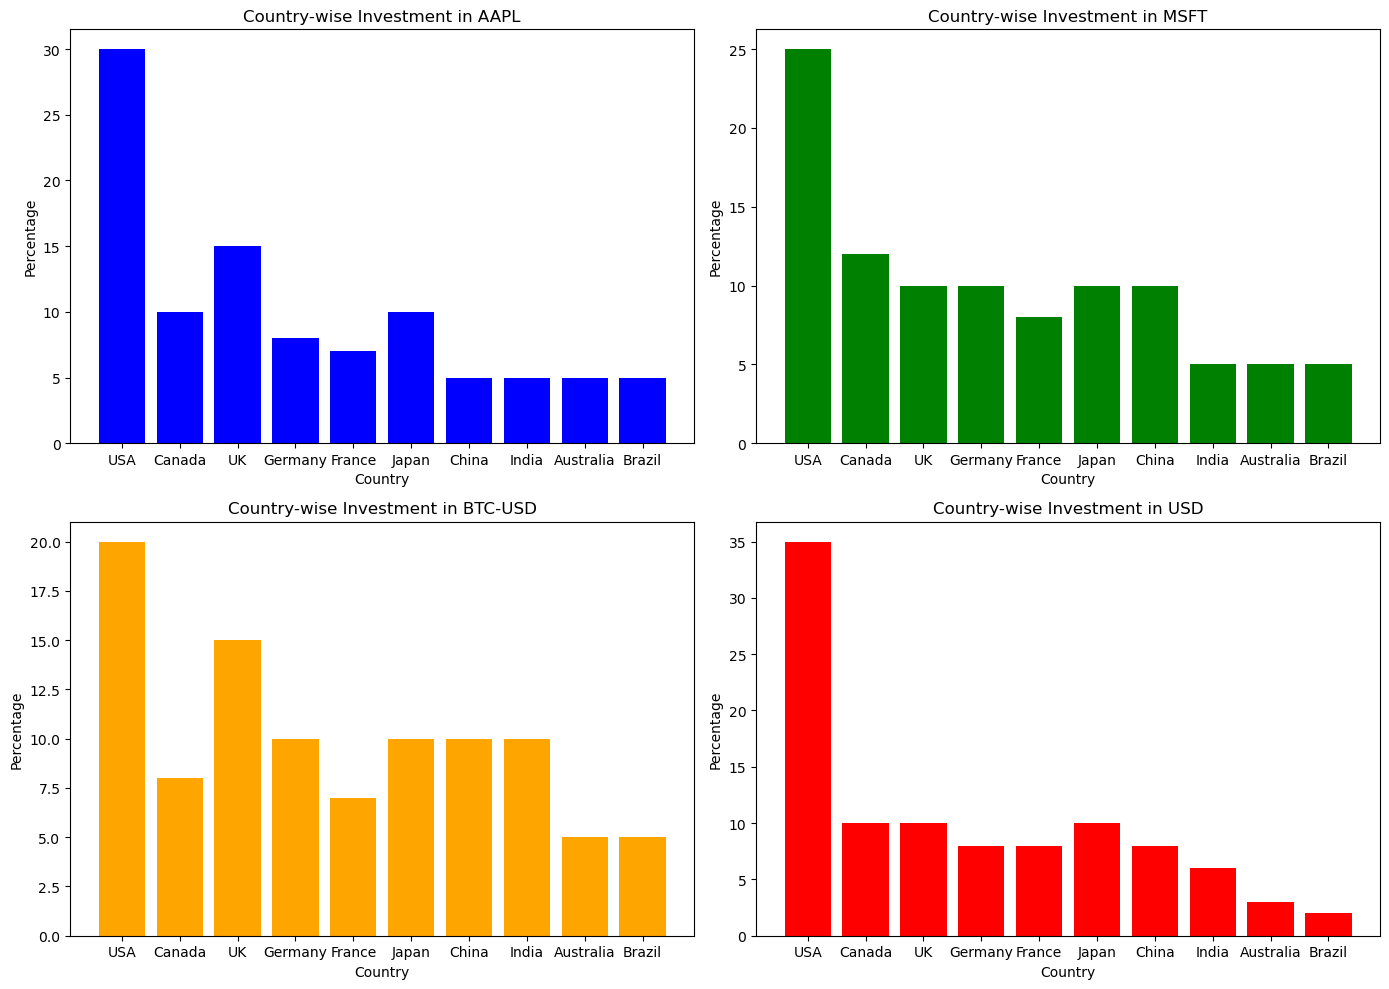

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Mock data representing percentage of investments in each asset by country
data = {
    'Country': ['USA', 'Canada', 'UK', 'Germany', 'France', 'Japan', 'China', 'India', 'Australia', 'Brazil'],
    'AAPL': [30, 10, 15, 8, 7, 10, 5, 5, 5, 5],
    'MSFT': [25, 12, 10, 10, 8, 10, 10, 5, 5, 5],
    'BTC-USD': [20, 8, 15, 10, 7, 10, 10, 10, 5, 5],
    'USD': [35, 10, 10, 8, 8, 10, 8, 6, 3, 2]
}

# Create a DataFrame from the mock data
investment_data = pd.DataFrame(data)

# Plotting the data using bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot AAPL investments
axes[0, 0].bar(investment_data['Country'], investment_data['AAPL'], color='blue')
axes[0, 0].set_title('Country-wise Investment in AAPL')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Percentage')

# Plot MSFT investments
axes[0, 1].bar(investment_data['Country'], investment_data['MSFT'], color='green')
axes[0, 1].set_title('Country-wise Investment in MSFT')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Percentage')

# Plot BTC-USD investments
axes[1, 0].bar(investment_data['Country'], investment_data['BTC-USD'], color='orange')
axes[1, 0].set_title('Country-wise Investment in BTC-USD')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Percentage')

# Plot USD investments
axes[1, 1].bar(investment_data['Country'], investment_data['USD'], color='red')
axes[1, 1].set_title('Country-wise Investment in USD')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()


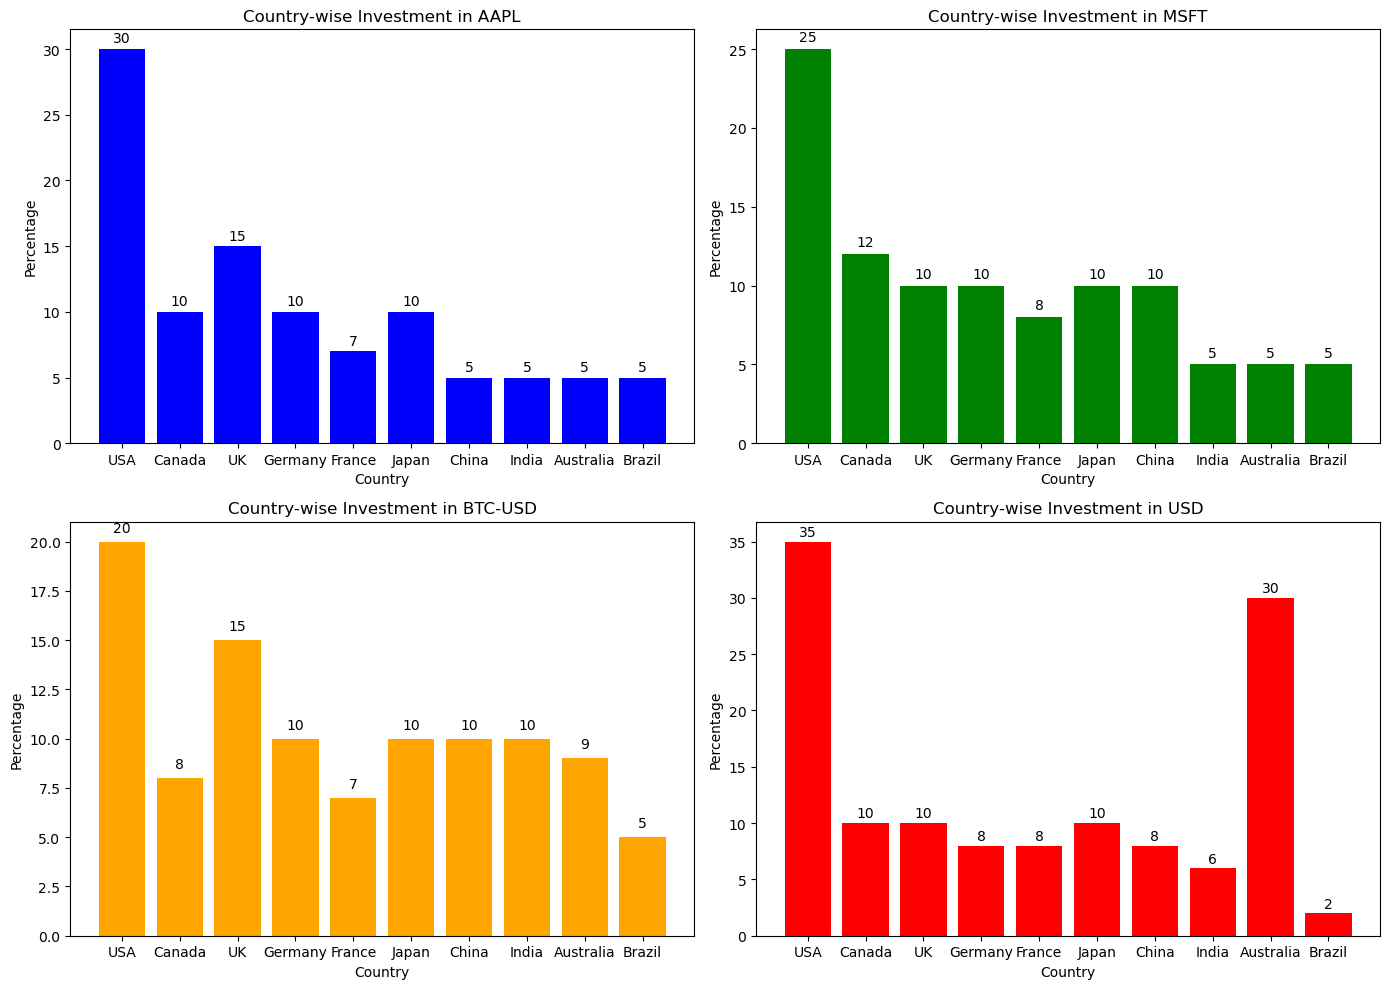

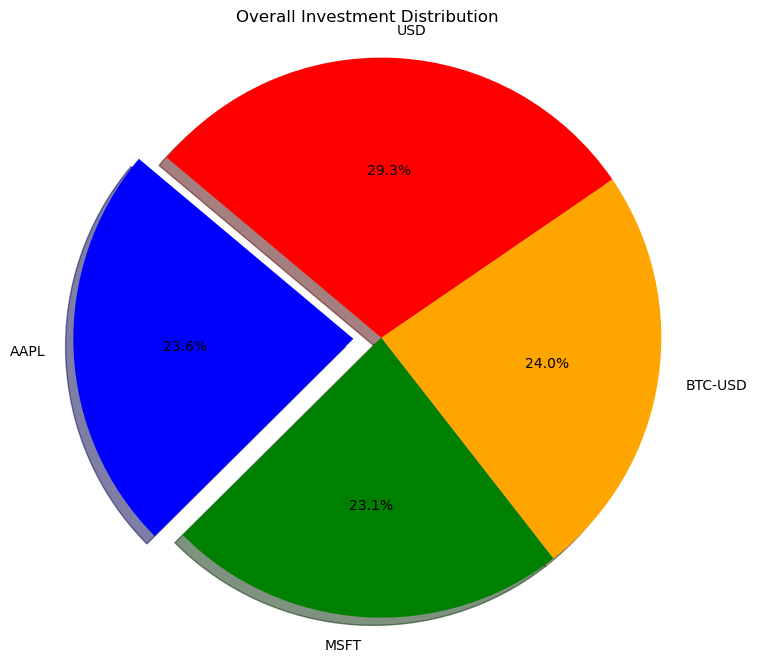

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Mock data representing percentage of investments in each asset by country
data = {
    'Country': ['USA', 'Canada', 'UK', 'Germany', 'France', 'Japan', 'China', 'India', 'Australia', 'Brazil'],
    'AAPL': [30, 10, 15, 10, 7, 10, 5, 5, 5, 5],
    'MSFT': [25, 12, 10, 10, 8, 10, 10, 5, 5, 5],
    'BTC-USD': [20, 8, 15, 10, 7, 10, 10, 10, 9, 5],
    'USD': [35, 10, 10, 8, 8, 10, 8, 6, 30, 2]
}

# Create a DataFrame from the mock data
investment_data = pd.DataFrame(data)

# Plotting the data using bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot AAPL investments
axes[0, 0].bar(investment_data['Country'], investment_data['AAPL'], color='blue')
axes[0, 0].set_title('Country-wise Investment in AAPL')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Percentage')
for i, v in enumerate(investment_data['AAPL']):
    axes[0, 0].text(i, v + 0.5, str(v), ha='center')

# Plot MSFT investments
axes[0, 1].bar(investment_data['Country'], investment_data['MSFT'], color='green')
axes[0, 1].set_title('Country-wise Investment in MSFT')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Percentage')
for i, v in enumerate(investment_data['MSFT']):
    axes[0, 1].text(i, v + 0.5, str(v), ha='center')

# Plot BTC-USD investments
axes[1, 0].bar(investment_data['Country'], investment_data['BTC-USD'], color='orange')
axes[1, 0].set_title('Country-wise Investment in BTC-USD')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Percentage')
for i, v in enumerate(investment_data['BTC-USD']):
    axes[1, 0].text(i, v + 0.5, str(v), ha='center')

# Plot USD investments
axes[1, 1].bar(investment_data['Country'], investment_data['USD'], color='red')
axes[1, 1].set_title('Country-wise Investment in USD')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Percentage')
for i, v in enumerate(investment_data['USD']):
    axes[1, 1].text(i, v + 0.5, str(v), ha='center')

# Adjust layout
plt.tight_layout()

# Show the bar graphs
plt.show()

# Create a pie chart
labels = ['AAPL', 'MSFT', 'BTC-USD', 'USD']
sizes = [
    investment_data['AAPL'].sum(),
    investment_data['MSFT'].sum(),
    investment_data['BTC-USD'].sum(),
    investment_data['USD'].sum()
]
colors = ['blue', 'green', 'orange', 'red']
explode = (0.1, 0, 0, 0)  # explode the first slice (AAPL)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Overall Investment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
